# Life expectancy depending on GDP analysis

In this project I will conduct an analysis based on a dataset containing life expectancy information based on a year, country and GDP of the country for a given year.

Here is the information about data provided in a dataset:

* **Country:** a country of the observation
* **Year:** a year of the observation
* **Life expectancy at birth (years):** life expectancy of a person born in a given year in a given country
* **GDP:** gross domestic product of a given country in a given year

The first thing I will do is to import needed libraries and inspect the data:

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#saving csv file to a variable and reading it
df = pd.read_csv('all_data.csv')
display(df)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


***
What we see in a loaded data is a scientific notation. While mathematically perfectly normal, it is hard to interpret the data in this format so I will convert it to a float with two decimals:
***

In [3]:
#stating the rule of displaying float numbers
pd.set_option('display.float_format', '{:.2f}'.format)

#displaying dataframe
display(df)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00
...,...,...,...,...
91,Zimbabwe,2011,54.90,12098450749.00
92,Zimbabwe,2012,56.60,14242490252.00
93,Zimbabwe,2013,58.00,15451768659.00
94,Zimbabwe,2014,59.20,15891049236.00


***
Now that the data is readable, I will inspect the number of null values and column data types.

I will also change GDP column to a more readable format.
***

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              96 non-null     object 
 1   year                 96 non-null     int64  
 2   life_expectancy      96 non-null     float64
 3   gdp_billion_dollars  96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


***
While inspecting the output, following conclusions can be made:
1. There are no null values. However, missing data is still possible, so we will inspect unique values to make sure;
2. Each data type is correct for it's  column;
3. It might be better to rename columns so it will be easier to reffer to them in code.
***

In [5]:
#changing GDP to billions dollars
df['GDP'] = df['GDP'].apply(lambda x: x / 1000000000)

#renaming columns and rows
df=df.rename(columns={
    'Country': 'country',
    'Year': 'year',
    'Life expectancy at birth (years)': 'life_expectancy',
    'GDP': 'gdp_billion_dollars'
})
df.country = df.country.replace({'United States of America': 'USA'})

#checking for missing data
for column in df.columns:
    print(df[column].unique())


['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
[77.3 77.8 77.9 78.  78.4 78.9 79.6 79.3 79.1 79.8 79.9 80.1 80.3 80.5
 71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
 75.8 76.1 78.3 78.5 79.2 80.  80.6 80.9 81.  74.8 75.3 76.  75.7 76.3
 76.6 76.7 76.8 76.9 77.  77.2 77.5 78.1 78.2 78.7 78.8 46.  45.3 44.8
 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.  59.2 60.7]
[7.78609322e+01 7.09799240e+01 6.97368114e+01 7.56434598e+01
 9.92103929e+01 1.22965000e+02 1.54788000e+02 1.73606000e+02
 1.79638000e+02 1.72389000e+02 2.18538000e+02 2.52252000e+02
 2.67122000e+02 2.78384000e+02 2.60990000e+02 2.42518000e+02
 1.21135000e+03 1.33940000e+03 1.47055000e+03 1.66029000e+03
 1.95535000e+03 2.28597000e+03 2.75213000e+03 3.55218000e+03
 4.59821000e+03 5.10995000e+03 6.10062000e+03 7.57255000e+03
 8.56055000e+03 9.60722000e+03 1.04824000e+04 1.10647000e+04
 1.94995000e+03 1.950650

***
Now that we have renamed columns and made sure that there is no missing data, we can start the analysis.

The first question we will look into is 'what is the mean life expectancy for each country over the course of 15 years?'
***

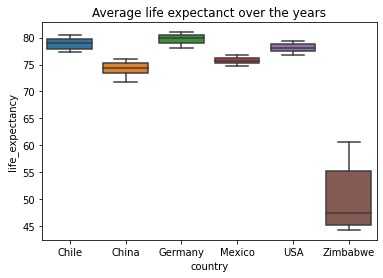

<Figure size 432x288 with 0 Axes>

In [6]:
sns.boxplot(x='country', y='life_expectancy', data=df)
plt.title('Average life expectanct over the years')
plt.show()
plt.clf()

***
Apparently, while most countries' life expectancy is between 70 and 80 years, Zimbabwe is falling behind at the average of 50 years.
But how was the life expectancy changing for each country over the years?
***

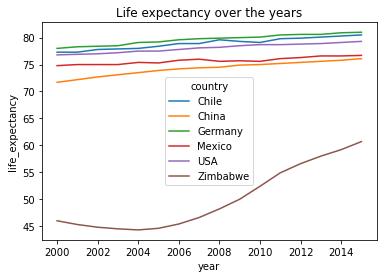

<Figure size 432x288 with 0 Axes>

In [7]:
sns.lineplot(x='year', y='life_expectancy', hue='country', data=df)
plt.title('Life expectancy over the years')
plt.show()
plt.clf()

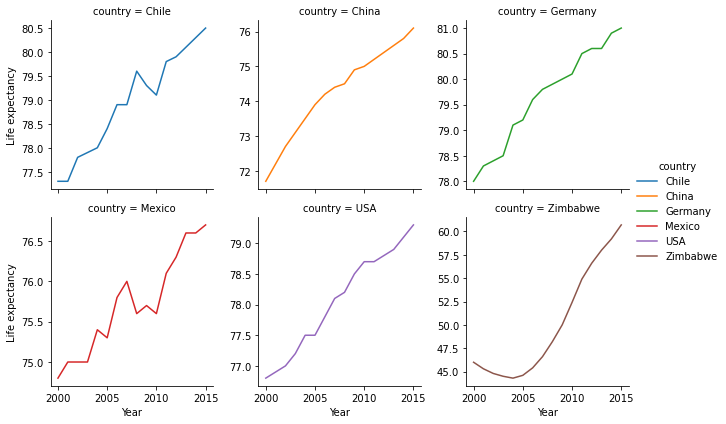

In [8]:
# for i in df.country.unique():
#     sns.lineplot(x='year', y=df.life_expectancy[df.country == i], data=df)
#     plt.title(i + ' life expectancy over the years')
#     plt.show()
#     plt.clf()

grid_life_expectancy = sns.FacetGrid(df, col='country', col_wrap=3, sharey=False, hue='country')
grid_life_expectancy = grid_life_expectancy.map(sns.lineplot, 'year', 'life_expectancy')\
        .add_legend()\
        .set_axis_labels('Year', 'Life expectancy')

***
We see a decrease in life expectancy in Zimbabwe from 2000 to 2004. With our data it is impossible to say for how long life expectancy was decreasing. This drop could be the reason of a low life expectancy in Zimbabwe.

Now, was GDP able to influence life expectancy? Let's find out by comparing countries' average GDP over the given years and looking into the scatterplot of GDP v. life expectancy
***

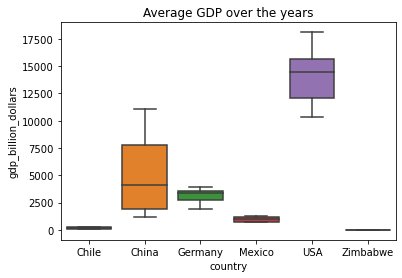

<Figure size 432x288 with 0 Axes>

In [9]:
sns.boxplot(x='country', y='gdp_billion_dollars', data=df)
plt.title('Average GDP over the years')
plt.show()
plt.clf()

***
We see a huge difference in countries' GDP.
Let's see how the GDP was changing for each country over the years and after that look into GDP and life expectancy relation.
***

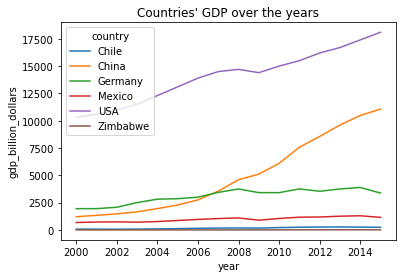

<Figure size 432x288 with 0 Axes>

In [10]:
sns.lineplot(x='year', y='gdp_billion_dollars', hue='country', data=df)
plt.title("Countries' GDP over the years")
plt.show()
plt.clf()

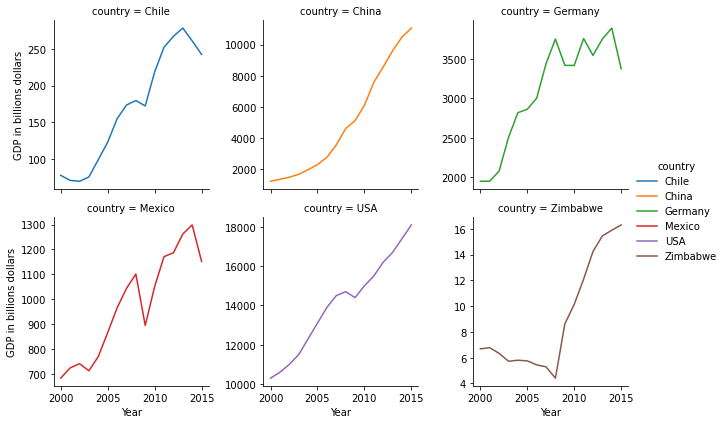

In [11]:
grid_gdp = sns.FacetGrid(df, col='country', col_wrap=3, hue='country', sharey=False)
grid_gdp = grid_gdp.map(sns.lineplot, 'year', 'gdp_billion_dollars')\
        .add_legend()\
        .set_axis_labels('Year', 'GDP in billions dollars')

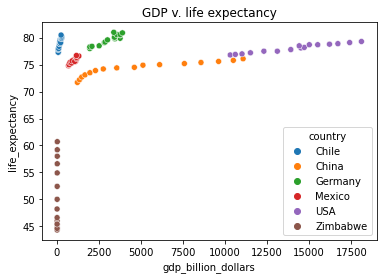

<Figure size 432x288 with 0 Axes>

In [12]:
sns.scatterplot(x='gdp_billion_dollars', y='life_expectancy', hue='country', data=df)
plt.title('GDP v. life expectancy')
plt.show()
plt.clf()

***
Since GDP of given countries is too far from each other, it is better to make a seperate charts for each country:
***

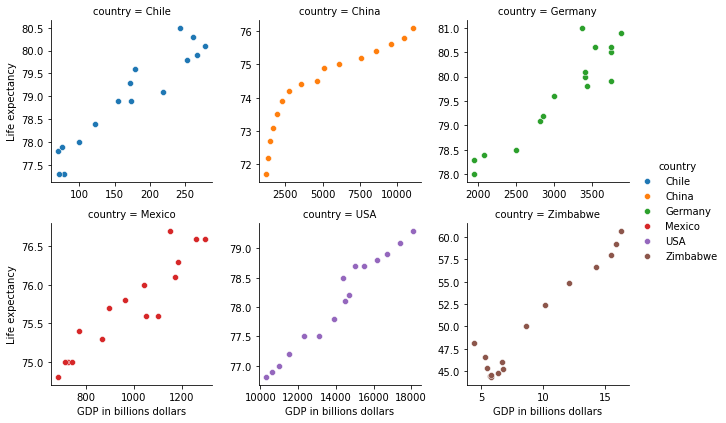

In [13]:
grip_gdp_life_expectancy = sns.FacetGrid(df, col='country', col_wrap=3, sharey=False, sharex=False, hue='country')
grip_gdp_life_expectancy = grip_gdp_life_expectancy.map(sns.scatterplot, 'gdp_billion_dollars', 'life_expectancy')\
        .add_legend()\
        .set_axis_labels('GDP in billions dollars', 'Life expectancy')

***
All of the observations show strong linear relations.

## Conclusions:
* Each observed country shows both life expectancy and GDP growth;
* China is the only country showing stable GDP growth without a single dip;
* Zimbabwe falls behind in both measures;
* Charts show strong linear relation between GDP and life expectancy;
* Even though Zimbabwe and Chile are close in terms of GDP, Chile has much higher life expectancy. This could mean that Zimbabwe has some other factors lowering life expectancy such as level of education or medical development. We will need additional data to explore this theory.